# Air Quality Dataset - Regression Analysis

This project is part of the work completed during my first term in the AI & ML program at Lambton College. The focus is on performing a regression analysis on the Air Quality Dataset from the UCI Machine Learning Repository.

#### Disclaimer: This was a group project.


### Dataset information 
The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)  and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.
 
### Features information 
 
* Date  
* Time  
* CO(GT) -> True hourly averaged concentration CO in mg/m^3 (reference analyzer)
* PT08.S1(CO) -> hourly averaged sensor response (nominally CO targeted)
* NMHC(GT) -> True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
* C6H6(GT) -> True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
* PT08.S2(NMHC) -> hourly averaged sensor response (nominally NMHC targeted)
* NOx(GT) -> True hourly averaged NOx concentration in ppb (reference analyzer)
* PT08.S3(NOx) -> hourly averaged sensor response (nominally NOx targeted)
* NO2(GT) -> True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
* PT08.S4(NO2) -> hourly averaged sensor response (nominally NO2 targeted)
* PT08.S5(O3) -> hourly averaged sensor response (nominally O3 targeted)
* T -> Temperature -> °C
* RH -> Relative Humidity -> %
* AH -> Absolute Humidity

 
 
 
source: https://archive.ics.uci.edu/dataset/360/air+quality


In [1]:
#library imports 
import pandas as pd

#format 
from datetime import datetime


#graphics 
import matplotlib.pyplot as plt
import seaborn as sns

#train and split 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor



In [2]:
#Import the dataset
air_quality_df = pd.read_csv('AirQualityUCI.csv',sep=';')

### I. Explore data

In [3]:
#a quick look to our dataset information, to understand before-hand 
#with which type of values we are working with 
air_quality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [4]:
#here we can see the type of value we are handlig 
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [5]:
#Now we are going to change some data type since our data frame came with differents data types than the expected
#as describe in the feature information 

#choose the feature to change data type
float_features = ['CO(GT)','C6H6(GT)','T','RH','AH']

#apply change to only selected features
air_quality_df[float_features] = air_quality_df[float_features].replace(regex={',': '.'}).astype(float)




In [6]:
air_quality_df.info()
#now we can see that all our features has the right data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [7]:
air_quality_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [8]:
#a statistic overview of our features
air_quality_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,NaN,NaN
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,NaN,NaN
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,NaN,NaN
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,NaN,NaN
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,NaN,NaN


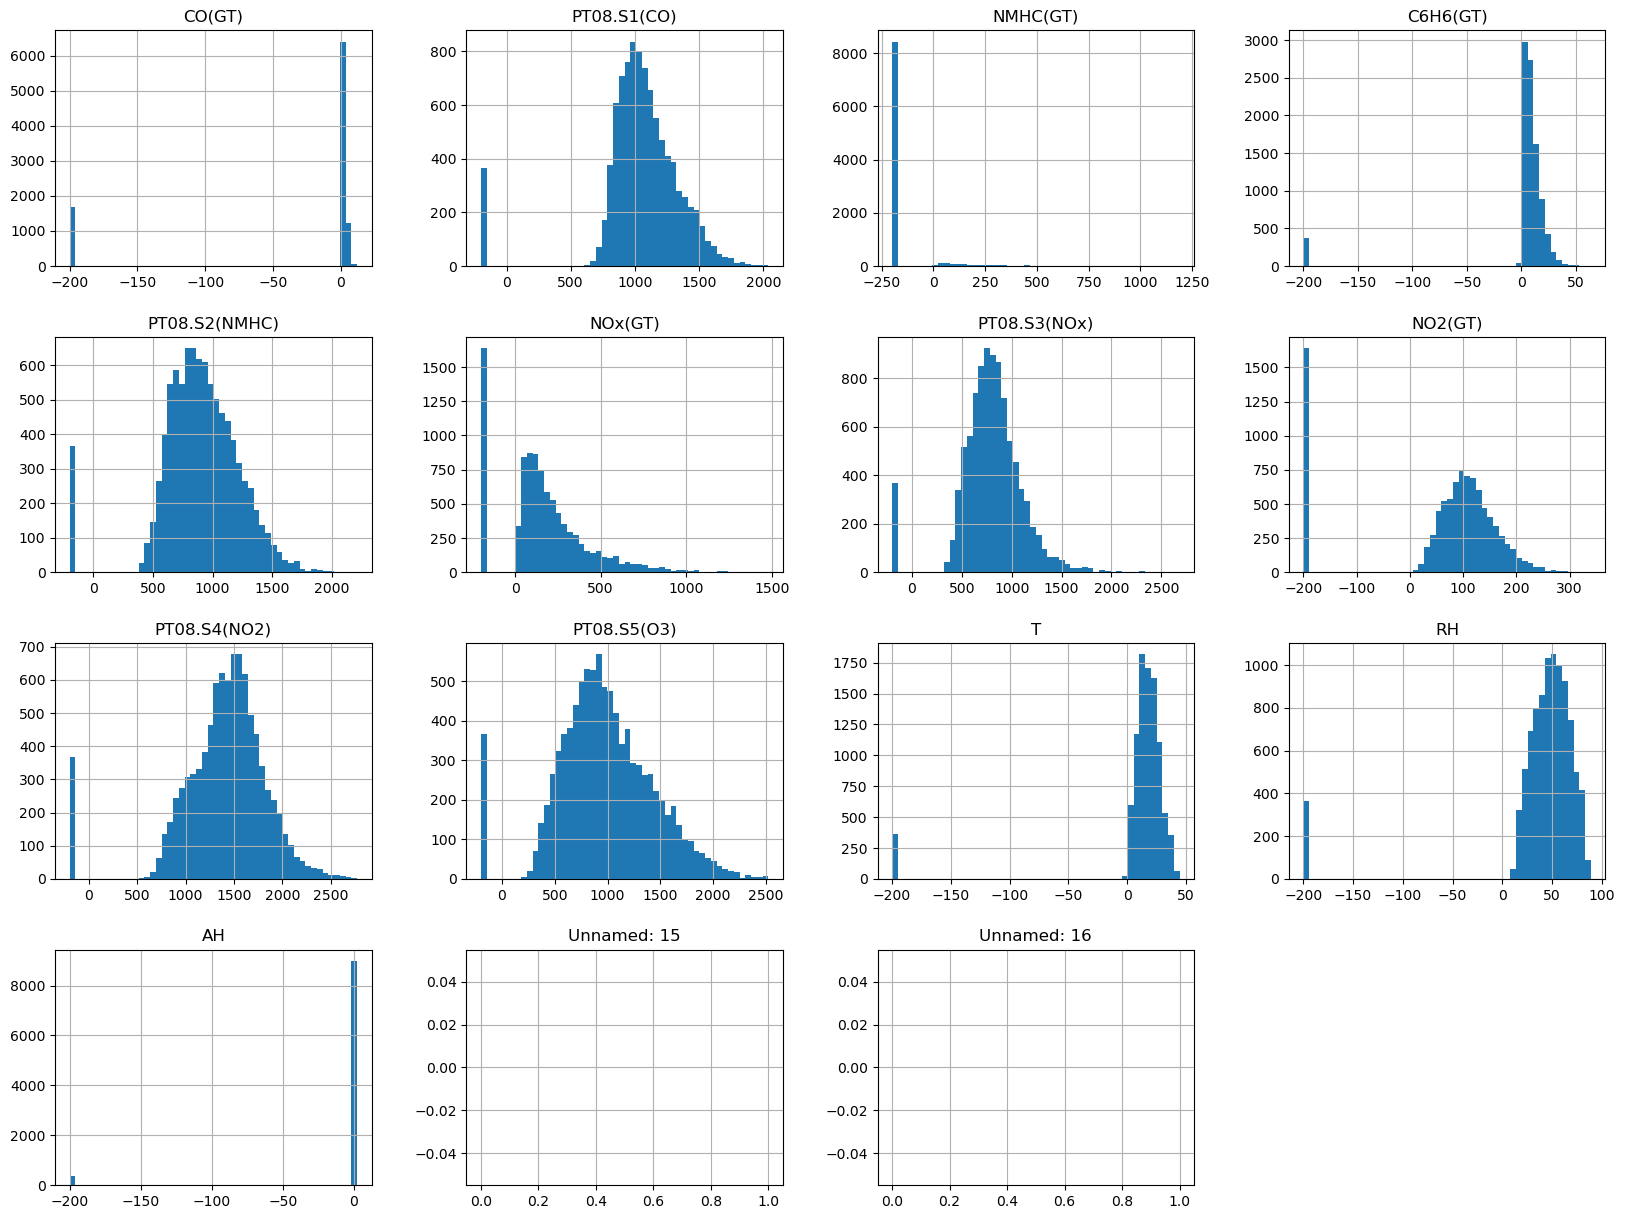

In [9]:
#let's see our data in graphs to have a better undestanding of our categorical or continous features 
air_quality_df.hist(bins=50, figsize=(20,15))
plt.show()

#some features are no shown, since some of them are object like CO(GT), C6H6(GT) and T
#in our histogram we can detect right away some outliers that will be handle in next step (Preprocessing)

### II. Preprocessing steps

* Query your data
* Clean your data (missing values & outliers )
* Format your data 

####  Query your data

In [10]:
#show amount of features and observations we have 
air_quality_df.shape


(9471, 17)

In [11]:
#show the features in detail  
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [12]:
#check for unique values 
air_quality_df.apply(pd.unique)

#as we can see we could say that we have no unique values, beside the ones that are missing 

Date             [10/03/2004, 11/03/2004, 12/03/2004, 13/03/200...
Time             [18.00.00, 19.00.00, 20.00.00, 21.00.00, 22.00...
CO(GT)           [2.6, 2.0, 2.2, 1.6, 1.2, 1.0, 0.9, 0.6, -200....
PT08.S1(CO)      [1360.0, 1292.0, 1402.0, 1376.0, 1272.0, 1197....
NMHC(GT)         [150.0, 112.0, 88.0, 80.0, 51.0, 38.0, 31.0, 2...
C6H6(GT)         [11.9, 9.4, 9.0, 9.2, 6.5, 4.7, 3.6, 3.3, 2.3,...
PT08.S2(NMHC)    [1046.0, 955.0, 939.0, 948.0, 836.0, 750.0, 69...
NOx(GT)          [166.0, 103.0, 131.0, 172.0, 89.0, 62.0, 45.0,...
PT08.S3(NOx)     [1056.0, 1174.0, 1140.0, 1092.0, 1205.0, 1337....
NO2(GT)          [113.0, 92.0, 114.0, 122.0, 116.0, 96.0, 77.0,...
PT08.S4(NO2)     [1692.0, 1559.0, 1555.0, 1584.0, 1490.0, 1393....
PT08.S5(O3)      [1268.0, 972.0, 1074.0, 1203.0, 1110.0, 949.0,...
T                [13.6, 13.3, 11.9, 11.0, 11.2, 11.3, 10.7, 10....
RH               [48.9, 47.7, 54.0, 60.0, 59.6, 59.2, 56.8, 59....
AH               [0.7578, 0.7255, 0.7502, 0.7867, 0.7888, 0.78

#### Data cleanning  (missing values & outliers )


In [13]:

#since we have two columns full of missing values we will remove them :
#Unnamed: 15  
#Unnamed: 16

air_quality_df = air_quality_df.drop(['Unnamed: 16','Unnamed: 15'], axis=1)


In [14]:
air_quality_df.shape

#as we can see, we remove two features that does not add value to our model 

(9471, 15)

In [15]:
#show NaN observations
air_quality_df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#remove all NaN 
air_quality_df = air_quality_df.dropna()


In [17]:
# NaN been remove
air_quality_df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


Before working with the outliers and other missing values marked as -200 we will format the data and try a regression model, so we can have information to compare 

#### Format your data

In [18]:
#change from object to date  data type - here for simplicity we combine date and time to create a timestamp
air_quality_df['DateTime'] =pd.to_datetime(air_quality_df['Date'] + ":" + air_quality_df['Time'], format='%d/%m/%Y:%H.%M.%S')


In [19]:
#show the new datetime datatype created 
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   object        
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  DateTime       9357 non-nu

In [20]:
#drop the Date and time features that won't be needed since we already have 
air_quality_df = air_quality_df.drop(['Date','Time'], axis=1)


In [21]:
#features formated 
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9357 non-null   float64       
 1   PT08.S1(CO)    9357 non-null   float64       
 2   NMHC(GT)       9357 non-null   float64       
 3   C6H6(GT)       9357 non-null   float64       
 4   PT08.S2(NMHC)  9357 non-null   float64       
 5   NOx(GT)        9357 non-null   float64       
 6   PT08.S3(NOx)   9357 non-null   float64       
 7   NO2(GT)        9357 non-null   float64       
 8   PT08.S4(NO2)   9357 non-null   float64       
 9   PT08.S5(O3)    9357 non-null   float64       
 10  T              9357 non-null   float64       
 11  RH             9357 non-null   float64       
 12  AH             9357 non-null   float64       
 13  DateTime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.1 MB


#### Feature selection and identification 

* Identify target features 
* Identify Categorical and Continuos features



In [23]:
#select target feature 
TARGET = 'NO2(GT)'

#select all features execpt the target 
columns_predictors = [col for col in air_quality_df.columns if col not in [TARGET]]

#separate between categorical and continuos 
columns_categorical = ['DateTime']
columns_continuos = [col for col in columns_predictors if col not in columns_categorical]

#show our Target and features 
print(f"TARGET: {TARGET}")
print(f"\nFeatures predictors: {columns_predictors}")
print(f"\nFeatures categorical: {columns_categorical}")


TARGET: NO2(GT)

Features predictors: ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'DateTime']

Features categorical: ['DateTime']


#### Regression model first attempt

In [24]:
#first we are going to try our dataset and see how it behave befor preparing the data, with theese we try to have
#a reference of how keep improving our predictions 

In [25]:
#take the features use to train and test our model and the target value 
X = air_quality_df[columns_continuos]
y = air_quality_df[TARGET]
    
#select a part of the values test 20% of all our observations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (7485, 12)
X_test.shape: (1872, 12)
y_train.shape: (7485,)
y_test.shape: (1872,)


In [26]:
X_train.shape #show our features and observations  for X

(7485, 12)

In [27]:
#look at the head 
X_train.head(5)
#as we see a lot of missing values are shown (-200)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
4957,-200.0,1013.0,-200.0,5.4,781.0,-200.0,829.0,1469.0,894.0,19.8,66.4,1.5145
6933,6.1,1438.0,-200.0,16.9,1208.0,626.0,528.0,1405.0,1962.0,10.8,52.4,0.6767
2265,0.6,906.0,-200.0,4.1,719.0,-200.0,1050.0,1561.0,612.0,24.3,48.2,1.4476
624,4.1,1543.0,710.0,19.8,1290.0,194.0,631.0,2011.0,1353.0,19.7,45.4,1.0312
7038,-200.0,982.0,-200.0,2.9,645.0,-200.0,922.0,1107.0,708.0,8.7,83.0,0.9393


In [28]:
#Investigate the missing values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7485 entries, 4957 to 2732
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7485 non-null   float64
 1   PT08.S1(CO)    7485 non-null   float64
 2   NMHC(GT)       7485 non-null   float64
 3   C6H6(GT)       7485 non-null   float64
 4   PT08.S2(NMHC)  7485 non-null   float64
 5   NOx(GT)        7485 non-null   float64
 6   PT08.S3(NOx)   7485 non-null   float64
 7   PT08.S4(NO2)   7485 non-null   float64
 8   PT08.S5(O3)    7485 non-null   float64
 9   T              7485 non-null   float64
 10  RH             7485 non-null   float64
 11  AH             7485 non-null   float64
dtypes: float64(12)
memory usage: 760.2 KB


In [29]:
#now let's apply a simple linear regression and see the outcomes 


# Linear regression  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#it fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares 
#between the observed targets in the dataset, and the targets predicted by the linear approximation.
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train, y_train)


LinearRegression(n_jobs=-1)

In [30]:
confidence_linear_reg = linear_reg.score(X_test, y_test)

#with the linear regression call the predicted results base on the test values offered 
prediction_l = linear_reg.predict(X)

print("Regression confidence  linear R",confidence_linear_reg)
print("Prediction",prediction_l)

#as we can see the confidence in our ML model is 0.82



Regression confidence  linear R 0.8203318843023112
Prediction [101.74489333  79.64869299  81.63971962 ... 128.79730741 109.61351911
 115.68025021]


In [31]:
y.shape #values in our 

(9357,)

In [32]:
prediction_l.shape

(9357,)

In [33]:
#Evaluating your best result

#MAE = True values – Predicted values
mae = mean_absolute_error(y, prediction_l)

print('Evaluating result', mae)

#Underfitting: The scenario when a machine learning model almost exactly matches the training data 
#but performs very poorly when it encounters new data or validation set.

#Overfitting: The scenario when a machine learning model is unable to capture the important patterns 
#and insights from the data, which results in the model performing poorly on training data itself.

Evaluating result 39.647090259901425


#### as we can se for this attemp our result evaluation give us 39.647, let's see if can remove the missing values  and get a better outcome 

### III. Feature engineering 

* Feature construction
* Feature transformation
* Dimension reduction

In [34]:
air_quality_df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357
mean,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604,2004-09-21 16:00:00
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,2004-03-10 18:00:00
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300,2004-06-16 05:00:00
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800,2004-09-21 16:00:00
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,2004-12-28 03:00:00
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005-04-04 14:00:00
std,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670,NaN


In [35]:
#as describe above in the Dataset information are missing values are identified as -200 
#we will take a look in the min and max values of each feature to identify the observations we are going to keep
    
#a count will tell us how many missing vaulues out of our dataset we have 
air_quality_df[air_quality_df== -200 ].count()

#as we can see we have amount of observations that belongs to our missing values

CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
DateTime            0
dtype: int64

In [36]:
#let's work with the missing values we have and understand which technique will be best to apply to each field

# Imputation 
# Omission 
# Analysis
  
# for the feature NMHC(GT) we have 8443 out of 9357 that's more than 90% of our observations, for this case we 
# are going to delete this feature 
air_quality_df = air_quality_df.drop(['NMHC(GT)'], axis=1)


In [37]:
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9357 non-null   float64       
 1   PT08.S1(CO)    9357 non-null   float64       
 2   C6H6(GT)       9357 non-null   float64       
 3   PT08.S2(NMHC)  9357 non-null   float64       
 4   NOx(GT)        9357 non-null   float64       
 5   PT08.S3(NOx)   9357 non-null   float64       
 6   NO2(GT)        9357 non-null   float64       
 7   PT08.S4(NO2)   9357 non-null   float64       
 8   PT08.S5(O3)    9357 non-null   float64       
 9   T              9357 non-null   float64       
 10  RH             9357 non-null   float64       
 11  AH             9357 non-null   float64       
 12  DateTime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12)
memory usage: 1023.4 KB


In [38]:
# the other missing values let's identify the min, max and mean of the rest to check if we can imputate 

#select features to check min values 
features = ['CO(GT)', 'PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)', 'PT08.S3(NOx)',
                  'NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH' ]

#to understand better our minimun we will exclude the missing values 
air_quality_df[air_quality_df[features] != -200 ].min()
#here we have a better idea of our minimun values

CO(GT)              0.1
PT08.S1(CO)       647.0
C6H6(GT)            0.1
PT08.S2(NMHC)     383.0
NOx(GT)             2.0
PT08.S3(NOx)      322.0
NO2(GT)             2.0
PT08.S4(NO2)      551.0
PT08.S5(O3)       221.0
T                  -1.9
RH                  9.2
AH               0.1847
DateTime            NaT
dtype: object

In [39]:
#max values for each feature
air_quality_df[features].max()


CO(GT)             11.900
PT08.S1(CO)      2040.000
C6H6(GT)           63.700
PT08.S2(NMHC)    2214.000
NOx(GT)          1479.000
PT08.S3(NOx)     2683.000
NO2(GT)           340.000
PT08.S4(NO2)     2775.000
PT08.S5(O3)      2523.000
T                  44.600
RH                 88.700
AH                  2.231
dtype: float64

In [40]:
air_quality_df[air_quality_df[features] != -200 ].mean()

CO(GT)               2.15275
PT08.S1(CO)      1099.833166
C6H6(GT)           10.083105
PT08.S2(NMHC)     939.153376
NOx(GT)           246.896735
PT08.S3(NOx)      835.493605
NO2(GT)           113.091251
PT08.S4(NO2)     1456.264598
PT08.S5(O3)      1022.906128
T                  18.317829
RH                 49.234201
AH                   1.02553
DateTime                 NaT
dtype: object

In [41]:
#for the features that have arround 366 missing values we will replace it with the mean 

# PT08.S1(CO)       
# C6H6(GT)          
# PT08.S2(NMHC)     
# PT08.S3(NOx)      
# PT08.S4(NO2)      
# PT08.S5(O3)       
# T
# RH                
# AH 

fill_value = air_quality_df[air_quality_df[features] != -200 ].mean()

air_quality_df['PT08.S1(CO)'] = air_quality_df['PT08.S1(CO)'].replace(-200, fill_value['PT08.S1(CO)'] )

air_quality_df['C6H6(GT)'] = air_quality_df['C6H6(GT)'].replace(-200, fill_value['C6H6(GT)'] )

air_quality_df['PT08.S2(NMHC)'] = air_quality_df['PT08.S2(NMHC)'].replace(-200, fill_value['PT08.S2(NMHC)'] )

air_quality_df['PT08.S3(NOx)'] = air_quality_df['PT08.S3(NOx)'].replace(-200, fill_value['PT08.S3(NOx)'] )

air_quality_df['PT08.S4(NO2)'] = air_quality_df['PT08.S4(NO2)'].replace(-200, fill_value['PT08.S4(NO2)'] )

air_quality_df['PT08.S5(O3)'] = air_quality_df['PT08.S5(O3)'].replace(-200, fill_value['PT08.S5(O3)'] )

air_quality_df['T'] = air_quality_df['T'].replace(-200, fill_value['T'] )

air_quality_df['RH'] = air_quality_df['RH'].replace(-200, fill_value['RH'] )

air_quality_df['AH'] = air_quality_df['AH'].replace(-200, fill_value['AH'] )

air_quality_df['NO2(GT)'] = air_quality_df['NO2(GT)'].replace(-200, fill_value['NO2(GT)'] )







In [42]:
#for this other features lets apply the min and max equally 
# CO(GT) 
# NOx(GT)  
# NO2(GT) 

min_features = ['CO(GT)','NOx(GT)']
fill_mean = air_quality_df[air_quality_df[min_features] != -200 ].min()


air_quality_df['CO(GT)'] = air_quality_df['CO(GT)'].replace(-200, fill_mean['CO(GT)'] )
air_quality_df['NOx(GT)'] = air_quality_df['NOx(GT)'].replace(-200, fill_mean['NOx(GT)'] )



In [43]:
#all our missing values are solved 
air_quality_df[air_quality_df== -200 ].count()

CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
DateTime         0
dtype: int64

In [44]:
#as you can see for some features our mean has change, for some has increment and other lower it depens on 
#the quantity of missing values and technique applied
air_quality_df.mean()


CO(GT)                      1.783531
PT08.S1(CO)              1099.833166
C6H6(GT)                   10.083105
PT08.S2(NMHC)             939.153376
NOx(GT)                   203.999893
PT08.S3(NOx)              835.493605
NO2(GT)                   113.091251
PT08.S4(NO2)             1456.264598
PT08.S5(O3)              1022.906128
T                          18.317829
RH                         49.234201
AH                           1.02553
DateTime         2004-09-21 16:00:00
dtype: object

In [45]:
air_quality_df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357
mean,1.783531,1099.833166,10.083105,939.153376,203.999893,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530,2004-09-21 16:00:00
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004-03-10 18:00:00
25%,0.600000,941.000000,4.600000,743.000000,50.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,36.600000,0.746100,2004-06-16 05:00:00
50%,1.500000,1075.000000,8.600000,923.000000,141.000000,818.000000,113.091251,1456.264598,983.000000,18.300000,49.234201,1.015400,2004-09-21 16:00:00
75%,2.600000,1221.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,2004-12-28 03:00:00
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005-04-04 14:00:00
std,1.534175,212.791672,7.302650,261.560236,214.662399,251.743954,43.920954,339.367559,390.612324,8.657639,16.974801,0.395835,NaN


Text(0.5, 1.0, 'Correlation')

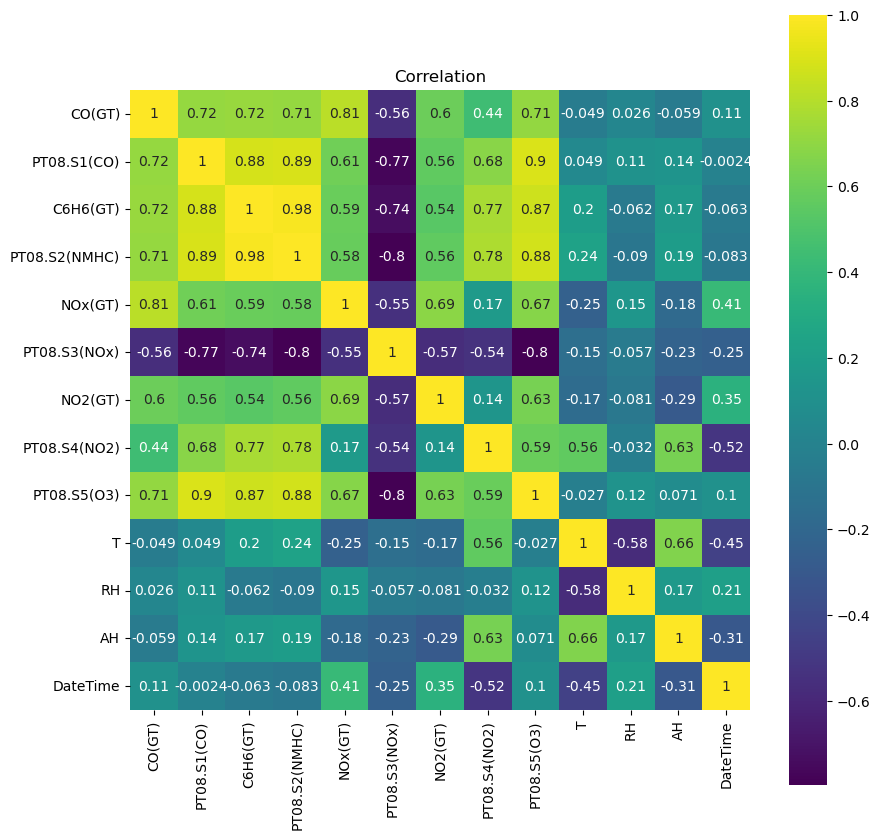

In [46]:
#Correlation wil tell us if a feature is releated with others and it also will indicate us if that feature 
#should be remove 

correlation = air_quality_df.corr()
#create graph for heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square =True, annot= True, cmap='viridis')
plt.title('Correlation')



In [47]:
#as we can see we have found some correlation between features
#since our target is 'NO2(GT)', we are going to remove this feature PT08.S3(NOx)  
#because is highly correlated and can influence our model results

air_quality_df = air_quality_df.drop(['PT08.S3(NOx)'], axis=1)



Text(0.5, 1.0, 'Correlation')

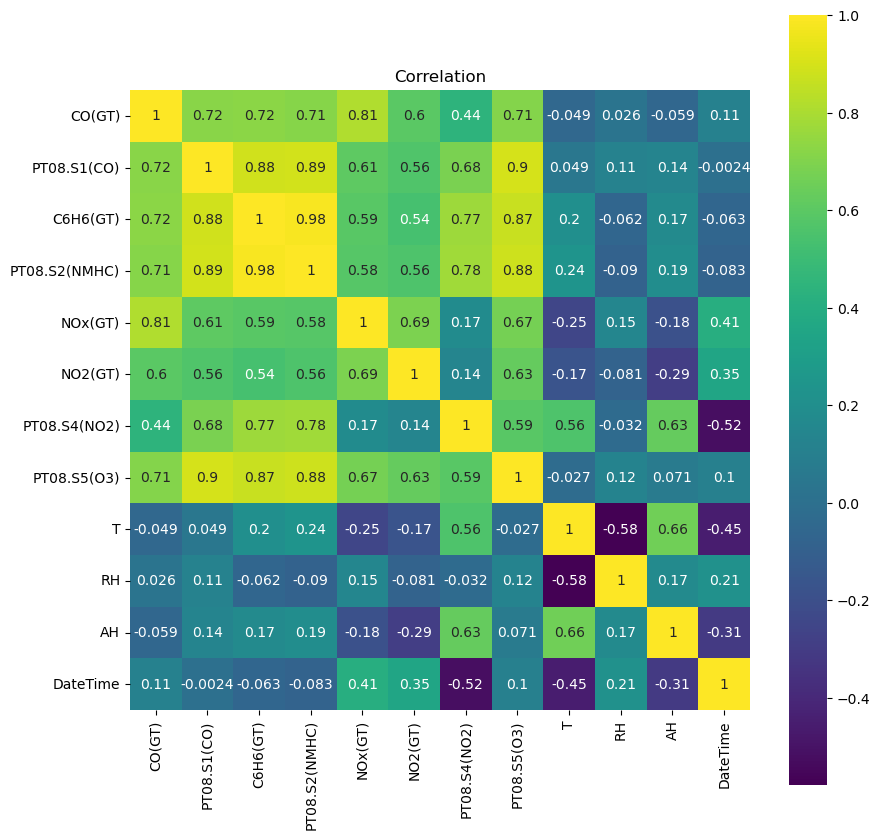

In [48]:
#Let's do correlation once again

correlation = air_quality_df.corr()
#create graph for heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square =True, annot= True, cmap='viridis')
plt.title('Correlation')

#now we can see how the correlation has decreased 


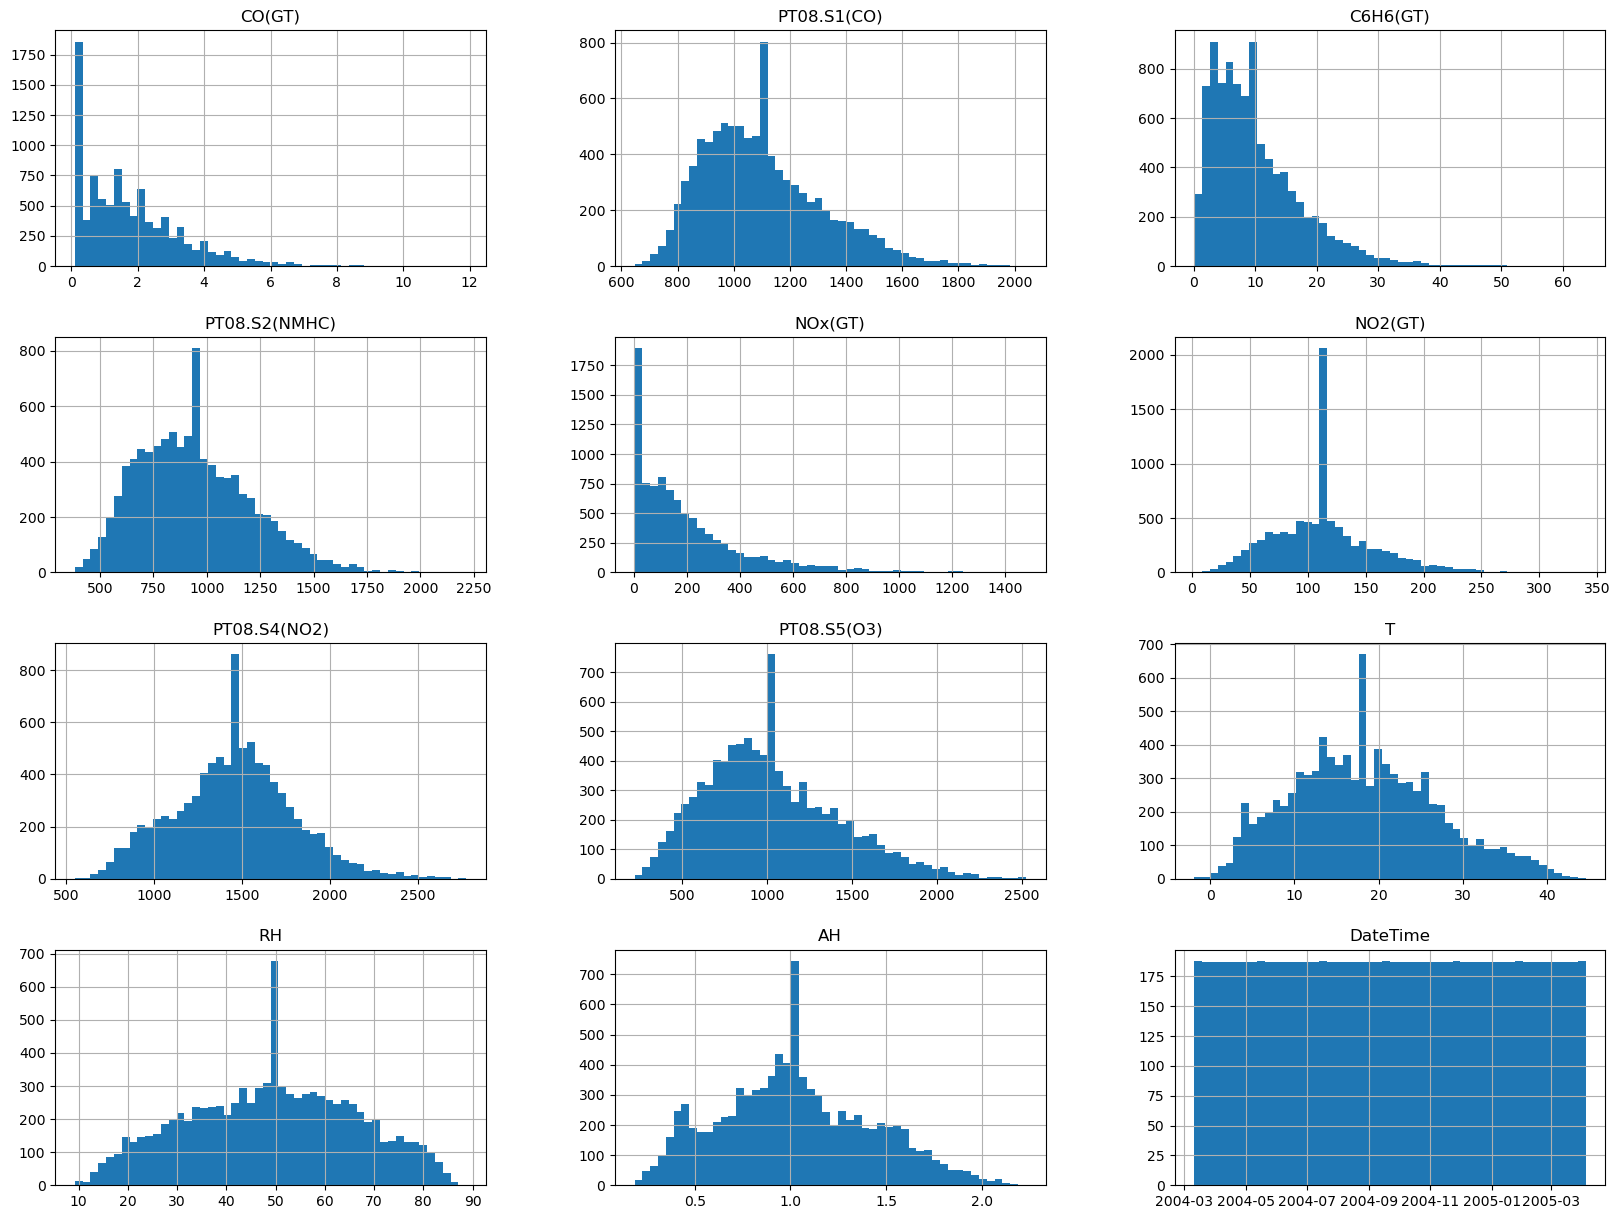

In [49]:
#let's see each feature of our dataset
air_quality_df.hist(bins=50, figsize=(20,15))
plt.show()


### IV. Data modeling 

* apply a REGRESSION learning alghorithm

#### Feature selection and identification 

* Identify target features 
* Identify Categorical and Continuos features



In [50]:
#since we made some changes to the features and the missing values, we might have to define again our predictors 
#target and type of feature 

#select target feature 
TARGET = 'NO2(GT)'

#select all features execpt the target 
feature_predictors = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S4(NO2)', 
                      'PT08.S5(O3)', 'T', 'RH', 'AH']

#separate between categorical and continuos 
feature_categorical = ['DateTime']
feature_continuos =  ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 
                      'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

#show our Target and features 
print(f"TARGET: {TARGET}")
print(f"\nFeatures predictors: {feature_predictors}")
print(f"\nFeatures categorical: {feature_categorical}")
print(f"\nFeatures continuos: {feature_continuos}")

TARGET: NO2(GT)

Features predictors: ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

Features categorical: ['DateTime']

Features continuos: ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']


In [51]:
air_quality_df.shape #as we can see our dataset has been reduce to 13 features

(9357, 12)

### V. Preformance measure 

* Train & test 
* Cross-validation
* Regression performance indicator 

#### Regression model second attempt

In [52]:
#take the features use to train and test our model and the target value 
X = air_quality_df[feature_predictors]
y = air_quality_df[TARGET]
    
#select a part of the values test 20% of all our observations
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) 
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (7485, 10)
X_test.shape: (1872, 10)
y_train.shape: (7485,)
y_test.shape: (1872,)


In [53]:
X_train.shape #show our features and observations  for X

(7485, 10)

In [54]:
#look at the head 
X_train.head(5)

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
4957,0.1,1013.0,5.4,781.0,2.0,1469.0,894.0,19.8,66.4,1.5145
6933,6.1,1438.0,16.9,1208.0,626.0,1405.0,1962.0,10.8,52.4,0.6767
2265,0.6,906.0,4.1,719.0,2.0,1561.0,612.0,24.3,48.2,1.4476
624,4.1,1543.0,19.8,1290.0,194.0,2011.0,1353.0,19.7,45.4,1.0312
7038,0.1,982.0,2.9,645.0,2.0,1107.0,708.0,8.7,83.0,0.9393


In [55]:
#Investigate the missing values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7485 entries, 4957 to 2732
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7485 non-null   float64
 1   PT08.S1(CO)    7485 non-null   float64
 2   C6H6(GT)       7485 non-null   float64
 3   PT08.S2(NMHC)  7485 non-null   float64
 4   NOx(GT)        7485 non-null   float64
 5   PT08.S4(NO2)   7485 non-null   float64
 6   PT08.S5(O3)    7485 non-null   float64
 7   T              7485 non-null   float64
 8   RH             7485 non-null   float64
 9   AH             7485 non-null   float64
dtypes: float64(10)
memory usage: 643.2 KB


##### Linear  Regression

In [56]:
#now let's apply a simple linear regression and see the outcomes 
    

# Linear regression  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#it fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares 
#between the observed targets in the dataset, and the targets predicted by the linear approximation.
linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(X_train, y_train)


LinearRegression(n_jobs=-1)

### VI. Preformance improvement  

* Reasons for underperformance (Underfitting, Overfitting ) MSE,MAE, R square
* Solution to improve performance

In [57]:
confidence_linear_reg = linear_reg.score(X_test, y_test)

#with the linear regression call the predicted results base on the test values offered 
prediction_two = linear_reg.predict(X)

print("Regression confidence  linear R",confidence_linear_reg)
print("Prediction",prediction_two)

#as we can see the confidence in our ML model is 0.82



Regression confidence  linear R 0.6276945535708226
Prediction [127.50901988 114.48415189 118.92902347 ... 153.43431086 142.67572877
 148.61097883]


In [58]:
y.shape #values in our 

(9357,)

In [59]:
prediction_two.shape

(9357,)

In [60]:
#Evaluating your best result

#MAE = True values – Predicted values
mae = mean_absolute_error(y, prediction_two)

print('Evaluating result', mae)

# The MAE value itself indicates the average absolute error between predicted and actual values. 
# The smaller the MAE, the better the model’s predictions align with the actual data.

#Underfitting: The scenario when a machine learning model almost exactly matches the training data 
#but performs very poorly when it encounters new data or validation set.

#Overfitting: The scenario when a machine learning model is unable to capture the important patterns 
#and insights from the data, which results in the model performing poorly on training data itself.

#first attempt MAE
#Evaluating result 39.647090259901425
#second attemp MAE

Evaluating result 20.99493100137732


##### Random Forest Regression

In [61]:

#A random forest is a meta estimator that fits a number of decision tree regressors on various sub-samples 
#of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

#Define hyperparameters:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "warm_start":True,
    "oob_score":True,
    "random_state": 42,
}
random_forest = RandomForestRegressor(**params)

random_forest.fit(X_train, y_train)    
    
RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)





RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

In [62]:
confidence_random_Forest = random_forest.score(X_test, y_test)

#with the Random Forest regression call the predicted results base on the test values offered 
prediction_three = random_forest.predict(X)

print("Regression confidence  linear R",confidence_random_Forest)
print("Prediction",prediction_three)


Regression confidence  linear R 0.758161453145644
Prediction [114.20380951  94.94977836  90.31665394 ... 148.83645513 143.49740212
 146.6462631 ]


In [63]:
mae = mean_absolute_error(y, prediction_three)

print('Evaluating result', mae)
#as we can see this results are better than linear regression 


#first attempt MAE
#Evaluating result 39.647090259901425
#second attemp MAE
#Evaluating result 20.99493100137732
#third attempt MAE

Evaluating result 14.352254433246767


##### AdaBoost  Regression

In [64]:
ada_boost = AdaBoostRegressor(random_state=0, n_estimators=100)

ada_boost.fit(X, y)

AdaBoostRegressor(n_estimators=100, random_state=0)




AdaBoostRegressor(n_estimators=100, random_state=0)

In [65]:
confidence_ada_boost= ada_boost.score(X_test, y_test)

#with the AdaBoost regression call the predicted results base on the test values offered 
prediction_fourth = ada_boost.predict(X)

print("Regression confidence  linear R",confidence_ada_boost)
print("Prediction",prediction_fourth)

Regression confidence  linear R 0.724493788915813
Prediction [115.59073047  99.1564546  107.65585697 ... 160.76215506 124.25693506
 147.11223881]


In [66]:
mae = mean_absolute_error(y, prediction_fourth)

print('Evaluating result', mae)
#as we can see this is not better than random forest 

#first attempt MAE
#Evaluating result 39.647090259901425
#second attempt MAE
#Evaluating result 20.99493100137732
#third attempt MAE
#Evaluating result 14.352254433246767
#fourth attempt
#Evaluating result 18.82985742759376

Evaluating result 18.82985742759376
